In [ ]:
import pandas as pd
from wordcloud import STOPWORDS
import string
from pyecharts.charts import Bar, Map
from pyecharts import options as opts
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import numpy as np
import re

In [ ]:
df_train=pd.read_csv("/Users/wangyanan/BA/train.csv")
df_test=pd.read_csv("/Users/wangyanan/BA/test.csv")

# 0.Data Preparation
## Calculate some basic calculation fields for two sets

In [ ]:
#word_count
df_train["word_count"] = df_train['text'].apply(lambda x: len(str(x).split()))
df_test["word_count"] = df_test['text'].apply(lambda x: len(str(x).split()))

In [ ]:
# unique_word_count
df_train["unique_word_count"] = df_train['text'].apply(lambda x: len(set(str(x).split())))
df_test["unique_word_count"] = df_test['text'].apply(lambda x: len(set(str(x).split())))

In [ ]:
# stop_word_count
df_train["stop_word"]= df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df_test["stop_word"] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))


In [ ]:
# punctuation_count
df_train["punctuation"] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test["punctuation"] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))


In [ ]:
# hashtag_count
df_train["hashtag"] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_test["hashtag"] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

In [ ]:
# mention_count
df_train["mention"] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
df_test["mention"] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

In [ ]:
#URL count
df_train["URL"]=df_train.text.str.match(r'[a-z]*[:.]+\S+', '')
df_test["URL"]=df_test.text.str.match(r'[a-z]*[:.]+\S+', '')
df_train["URL"]=df_train["URL"].astype("int")
df_test["URL"]=df_test["URL"].astype("int")

In [ ]:
df_train.target.groupby(df_train["target"]).count()

/opt/anaconda3/envs/charts/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


target
0    4342
1    3271
Name: target, dtype: int64

### Some calculation fields' distributions, while the data volumn is too large so that the plots are a bit messy.

In [ ]:
train_word = (
        Bar()
        .add_xaxis( list(df_train["id"]) )
         .add_yaxis("word_count",list(train_word_count))
        .add_yaxis("unique_word_count",list(train_unique_word_count))
        .add_yaxis("stop_word_count",list(train_stop_word))
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(title_opts=opts.TitleOpts(title="word count Distribution"),
                        datazoom_opts=opts.DataZoomOpts())
        #.render_notebook()
)
train_word.render_notebook()

/opt/anaconda3/envs/charts/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/envs/charts/lib/python3.8/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


# 1.Summary Table

In [ ]:
#describe the basic info
df_train_des=df_train_vis.drop(["target"],axis=1)
df_train_des.describe()

/opt/anaconda3/envs/charts/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,word_count,unique_word_count,stop_word,punctuation,hashtag,mention,URL
count,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000
mean,14.903586,14.340733,4.672928,6.839485,0.446999,0.362406,0.018258
std,5.732604,5.277160,3.559228,4.608758,1.099841,0.720097,0.133893
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,11.000000,2.000000,3.000000,0.000000,0.000000,0.000000
50%,15.000000,14.000000,4.000000,6.000000,0.000000,0.000000,0.000000
75%,19.000000,18.000000,7.000000,10.000000,0.000000,1.000000,0.000000
max,31.000000,29.000000,19.000000,61.000000,13.000000,8.000000,1.000000


In [ ]:
df_test.head()
df_test_des=df_test.iloc[:,4:]
df_test_des.describe()

/opt/anaconda3/envs/charts/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,word_count,unique_word_count,stop_word,punctuation,hashtag,mention,URL
count,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000
mean,14.965369,14.407294,4.617223,6.950659,0.472878,0.392277,0.018694
std,5.783576,5.306016,3.509596,4.486544,1.090811,0.758739,0.135464
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,11.000000,2.000000,4.000000,0.000000,0.000000,0.000000
50%,15.000000,15.000000,4.000000,7.000000,0.000000,0.000000,0.000000
75%,19.000000,18.000000,7.000000,10.000000,0.000000,1.000000,0.000000
max,31.000000,28.000000,18.000000,55.000000,12.000000,10.000000,1.000000


# 2.Data Visualization
## 2.1 Text 

In [ ]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

     |████████████████████████████████| 12.0 MB 100 kB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019122 sha256=d73dddcf399352a7dbd3aa4755b3d748229fdbd2045ba200518436e9d110cc2d
  Stored in directory: /Users/wangyanan/Library/Caches/pip/wheels/fc/31/e9/092e6f05b2817c9cb45804a3d1bf2b9bf6575742c01819337c
Successfully built en-core-web-sm


In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

/opt/anaconda3/envs/charts/lib/python3.8/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
# Remove URLs from tweets
df_train.text = [re.sub(r'[a-z]*[:.]+\S+', '', x) for x in df_train.text]
df_train.text = [re.sub(r'\&amp', '', x) for x in df_train.text]
df_test.text = [re.sub(r'[a-z]*[:.]+\S+', '', x) for x in df_test.text]
df_test.text = [re.sub(r'\&amp', '', x) for x in df_test.text]

In [ ]:
text_TRUE = nlp(df_train[df_train['target']==1]['text'].str.cat(sep=' '))
text_FALSE = nlp(df_train[df_train['target']==0]['text'].str.cat(sep=' '))
test_text = nlp(df_test['text'].str.cat(sep=' '))


In [ ]:
# Remove stop words, punctuation, and spaces
train_TRUE = [token.text.lower() for token in text_TRUE
            if token.is_stop != True 
            and token.is_punct != True 
            and token.text != ' ' 
            and token.text != '  '
            and token.text != '|'
            and token.text != '\n' 
            and token.text != '\n\n']

train_FALSE = [token.text.lower() for token in text_FALSE 
             if token.is_stop != True 
             and token.is_punct != True 
             and token.text != ' ' 
             and token.text != '|'
             and token.text != '  '
             and token.text != '\n'
             and token.text != '\n\n']
test_TEXT = [token.text.lower() for token in test_text 
             if token.is_stop != True 
             and token.is_punct != True 
             and token.text != ' ' 
             and token.text != '|'
             and token.text != '  '
             and token.text != '\n'
             and token.text != '\n\n']

In [ ]:
common_train_TRUE = pd.DataFrame(Counter(train_TRUE).most_common(20), columns = ["Word", "Frequency"])
common_train_FALSE = pd.DataFrame(Counter(train_FALSE).most_common(20), columns = ["Word", "Frequency"])
common_test_text = pd.DataFrame(Counter(test_TEXT).most_common(20), columns = ["Word", "Frequency"])


/opt/anaconda3/envs/charts/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


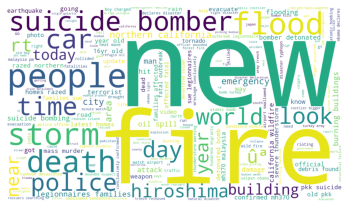

In [ ]:
wordcloud1=WordCloud(background_color="white",width=2000, height=1160, margin=2).generate(' '.join(train_TRUE))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

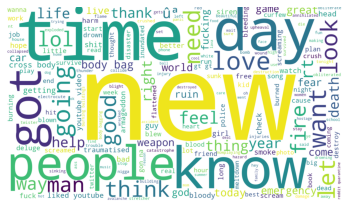

In [ ]:
wordcloud2=WordCloud(background_color="white",width=2000, height=1160, margin=2).generate(' '.join(train_FALSE))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

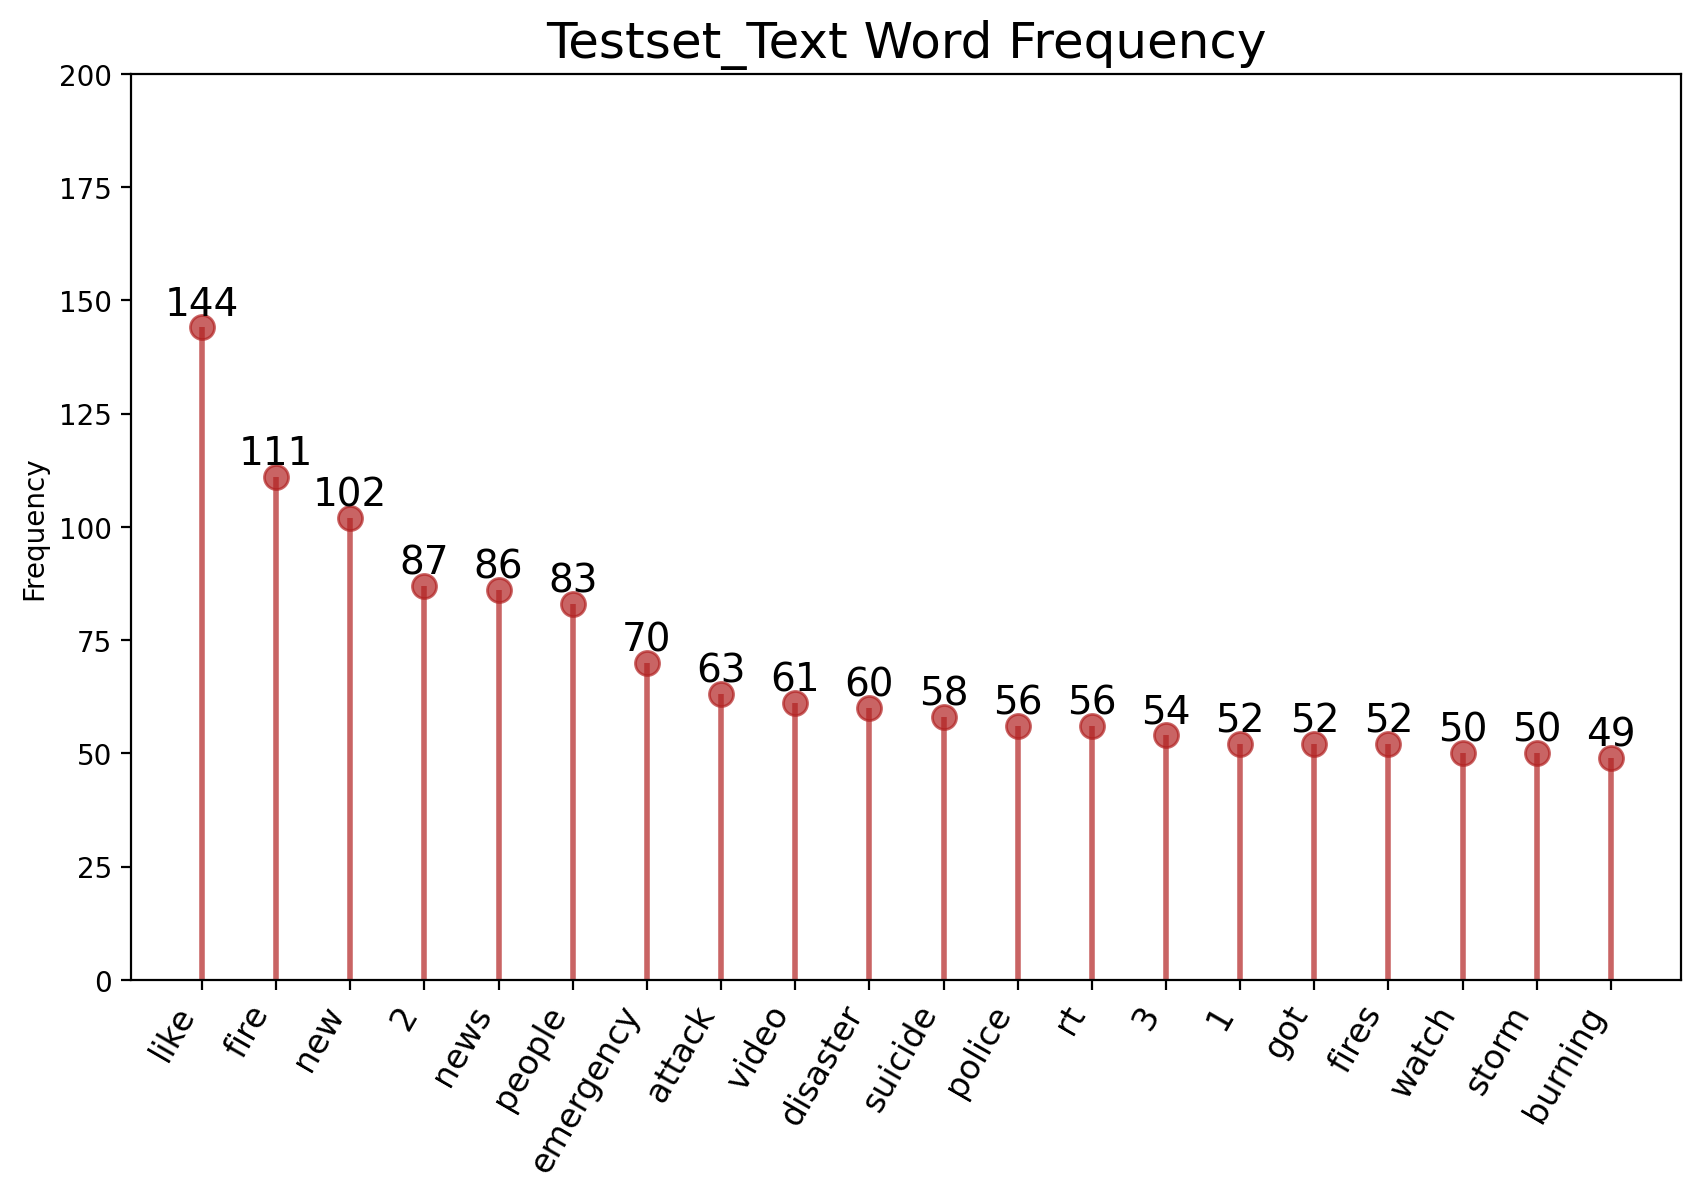

In [ ]:
# Draw word frequency plot for testset
fig, ax = plt.subplots(figsize=(10,6), dpi= 200)
ax.vlines(x=common_test_text["Word"], ymin=0, ymax=common_test_text["Frequency"], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=common_test_text["Word"], y=common_test_text["Frequency"], s=75, color='firebrick', alpha=0.7)
# Title, Label, Ticks and Ylim
ax.set_title('Testset_Text Word Frequency', fontdict={'size':18})
ax.set_ylabel('Frequency')
ax.set_xticks(common_test_text["Word"])
ax.set_xticklabels(common_test_text["Word"], rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 200)

# Annotate
for row in common_test_text.itertuples():
    ax.text(row.Index, row.Frequency+1, s=round(row.Frequency, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)
plt.savefig("10101.png")
plt.show()

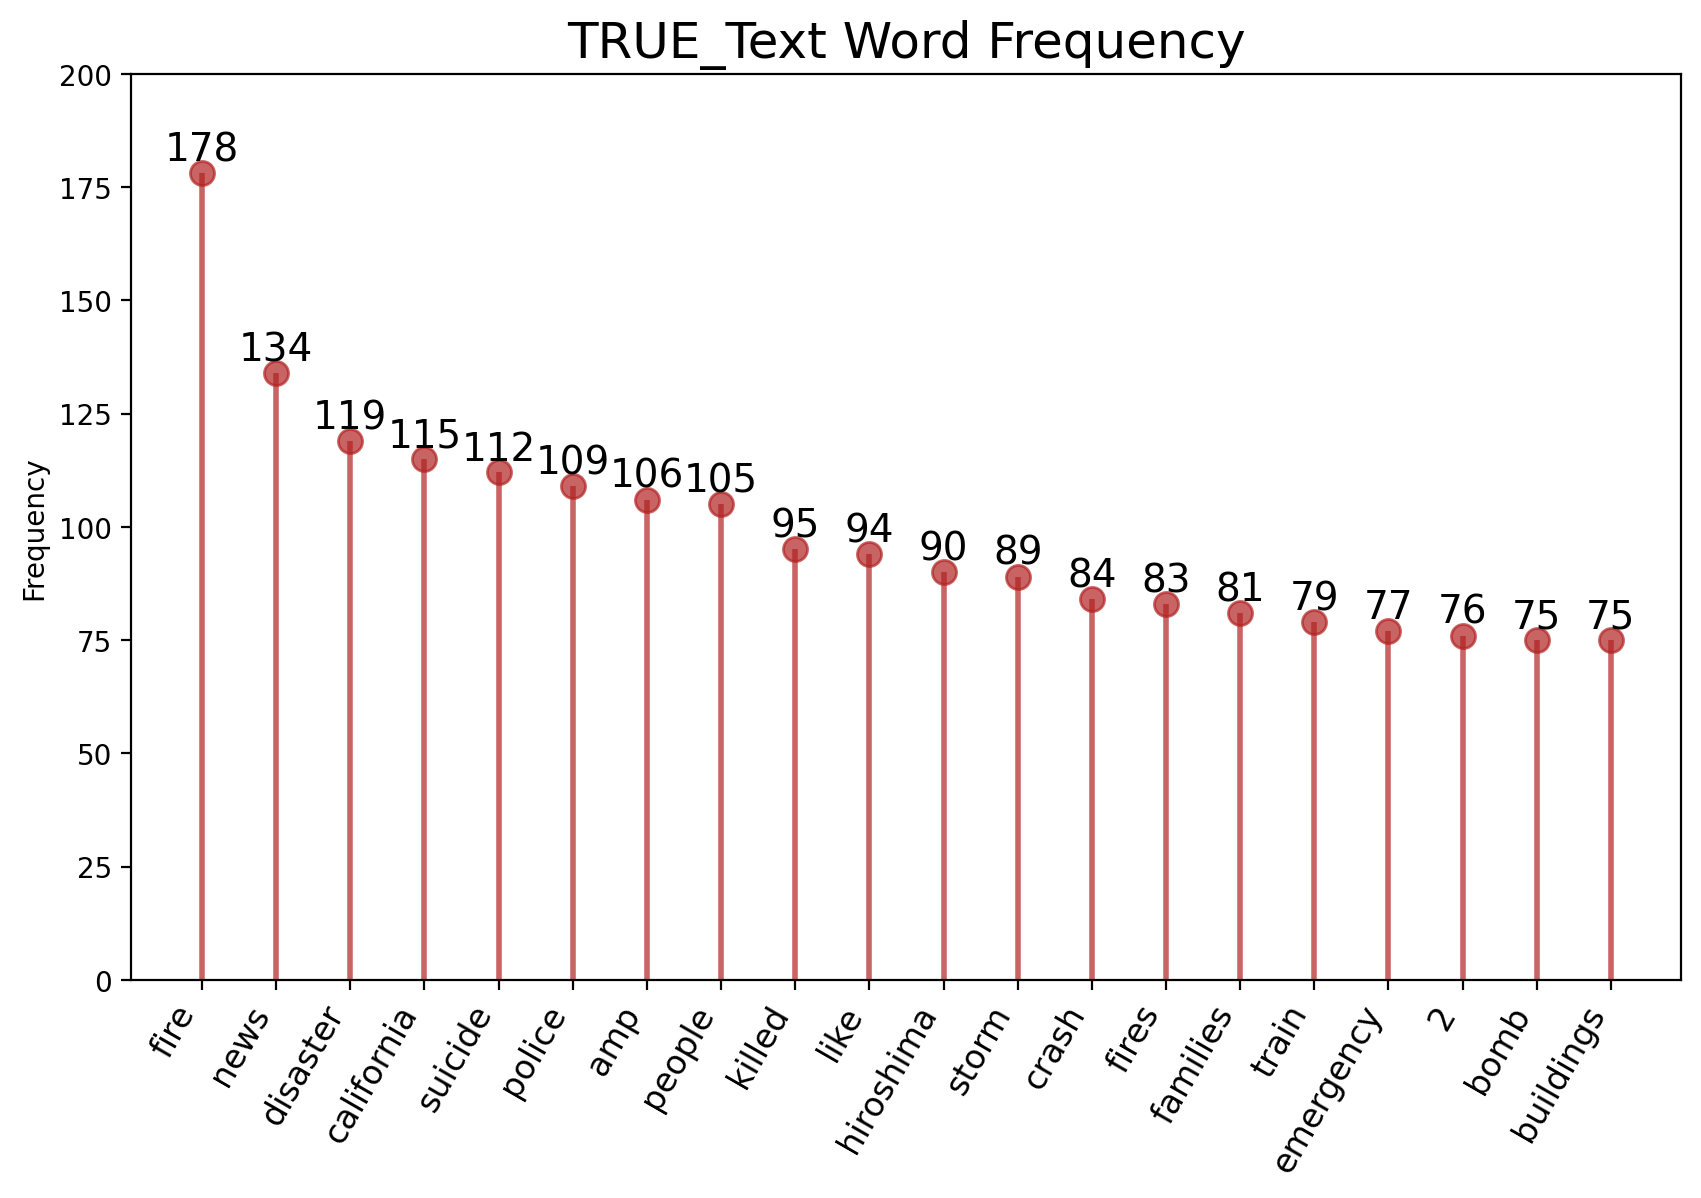

In [ ]:
# Draw word frequency plot for trainset
fig, ax = plt.subplots(figsize=(10,6), dpi= 200)
ax.vlines(x=common_train_TRUE["Word"], ymin=0, ymax=common_train_TRUE["Frequency"], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=common_train_TRUE["Word"], y=common_train_TRUE["Frequency"], s=75, color='firebrick', alpha=0.7)
# Title, Label, Ticks and Ylim
ax.set_title('TRUE_Text Word Frequency', fontdict={'size':18})
ax.set_ylabel('Frequency')
ax.set_xticks(common_train_TRUE["Word"])
ax.set_xticklabels(common_train_TRUE["Word"], rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 200)

# Annotate
for row in common_train_TRUE.itertuples():
    ax.text(row.Index, row.Frequency+1, s=round(row.Frequency, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

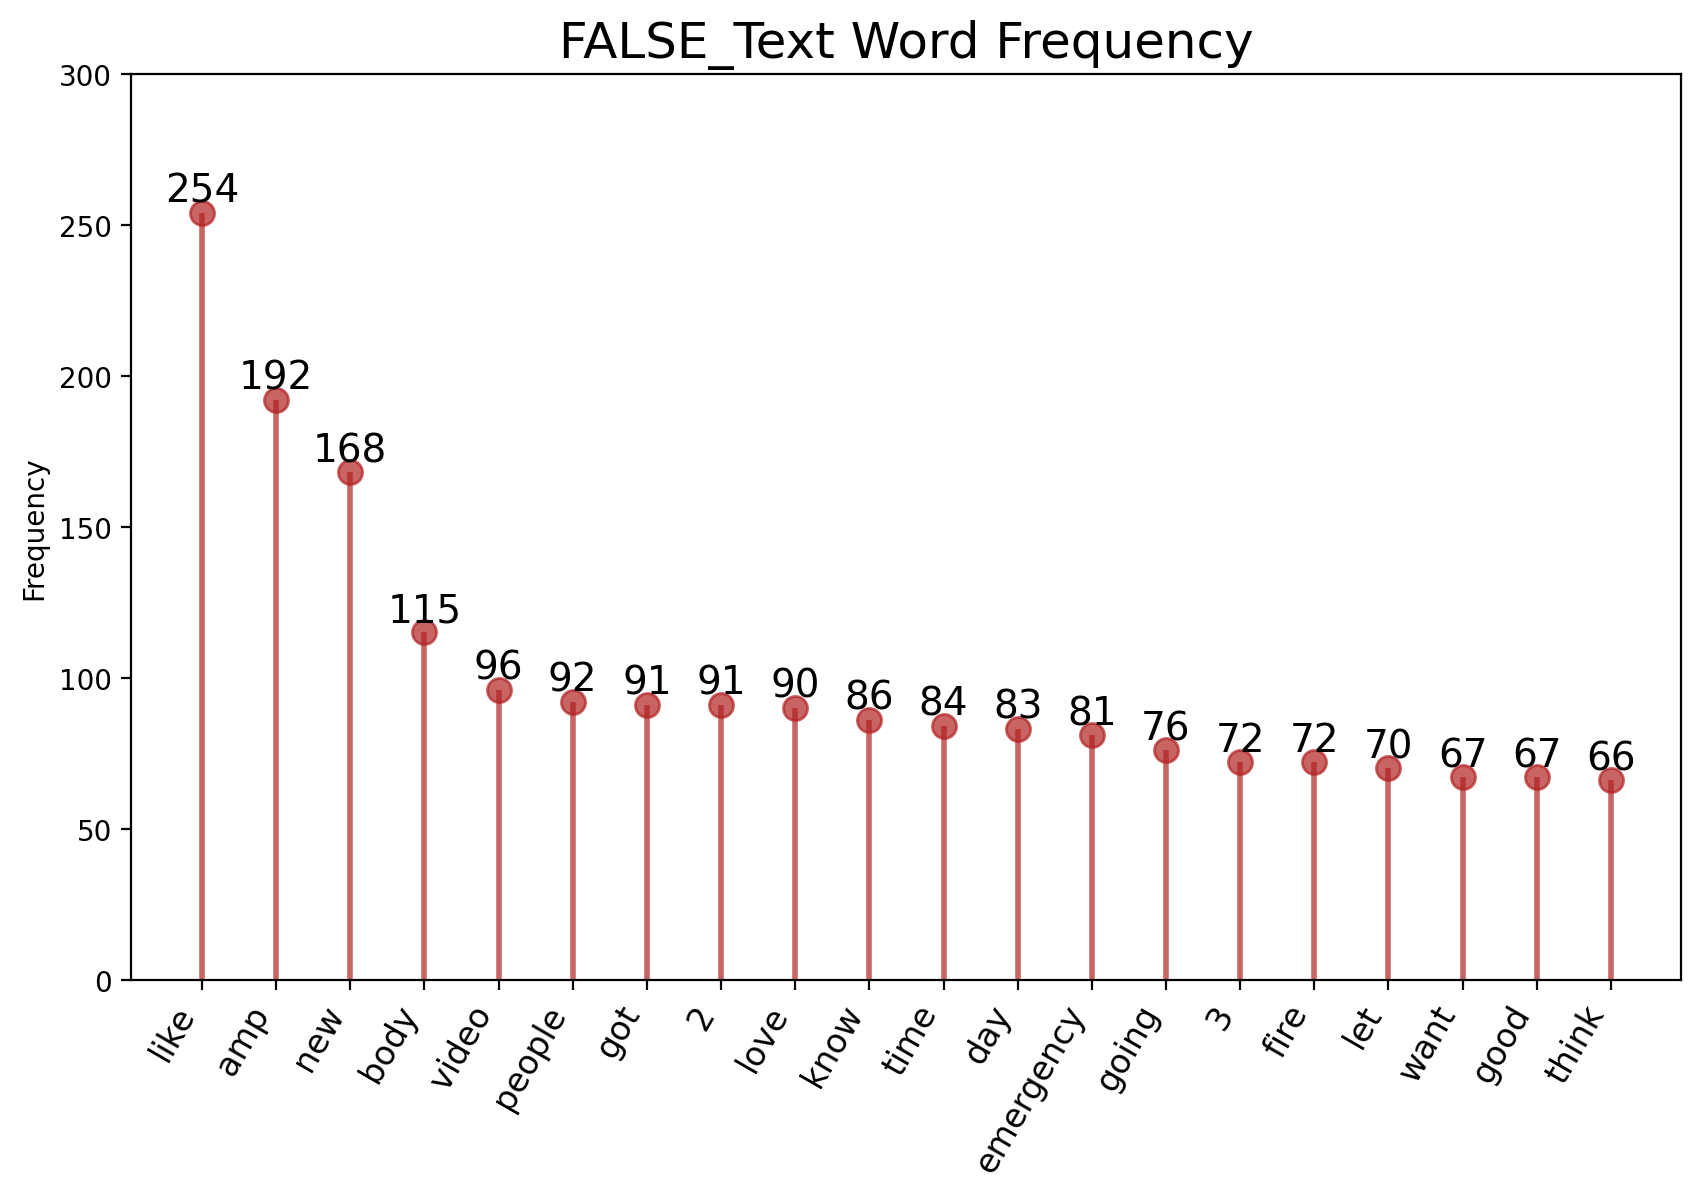

In [ ]:
# Draw false_word frency plot
fig, ax = plt.subplots(figsize=(10,6), dpi= 200)
ax.vlines(x=common_train_FALSE["Word"], ymin=0, ymax=common_train_FALSE["Frequency"], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=common_train_FALSE["Word"], y=common_train_FALSE["Frequency"], s=75, color='firebrick', alpha=0.7)
# Title, Label, Ticks and Ylim
ax.set_title('FALSE_Text Word Frequency', fontdict={'size':18})
ax.set_ylabel('Frequency')
ax.set_xticks(common_train_FALSE["Word"])
ax.set_xticklabels(common_train_FALSE["Word"], rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 300)

# Annotate
for row in common_train_FALSE.itertuples():
    ax.text(row.Index, row.Frequency+1, s=round(row.Frequency, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

## 2.2 Punctutations in Text

<BarContainer object of 18 artists>

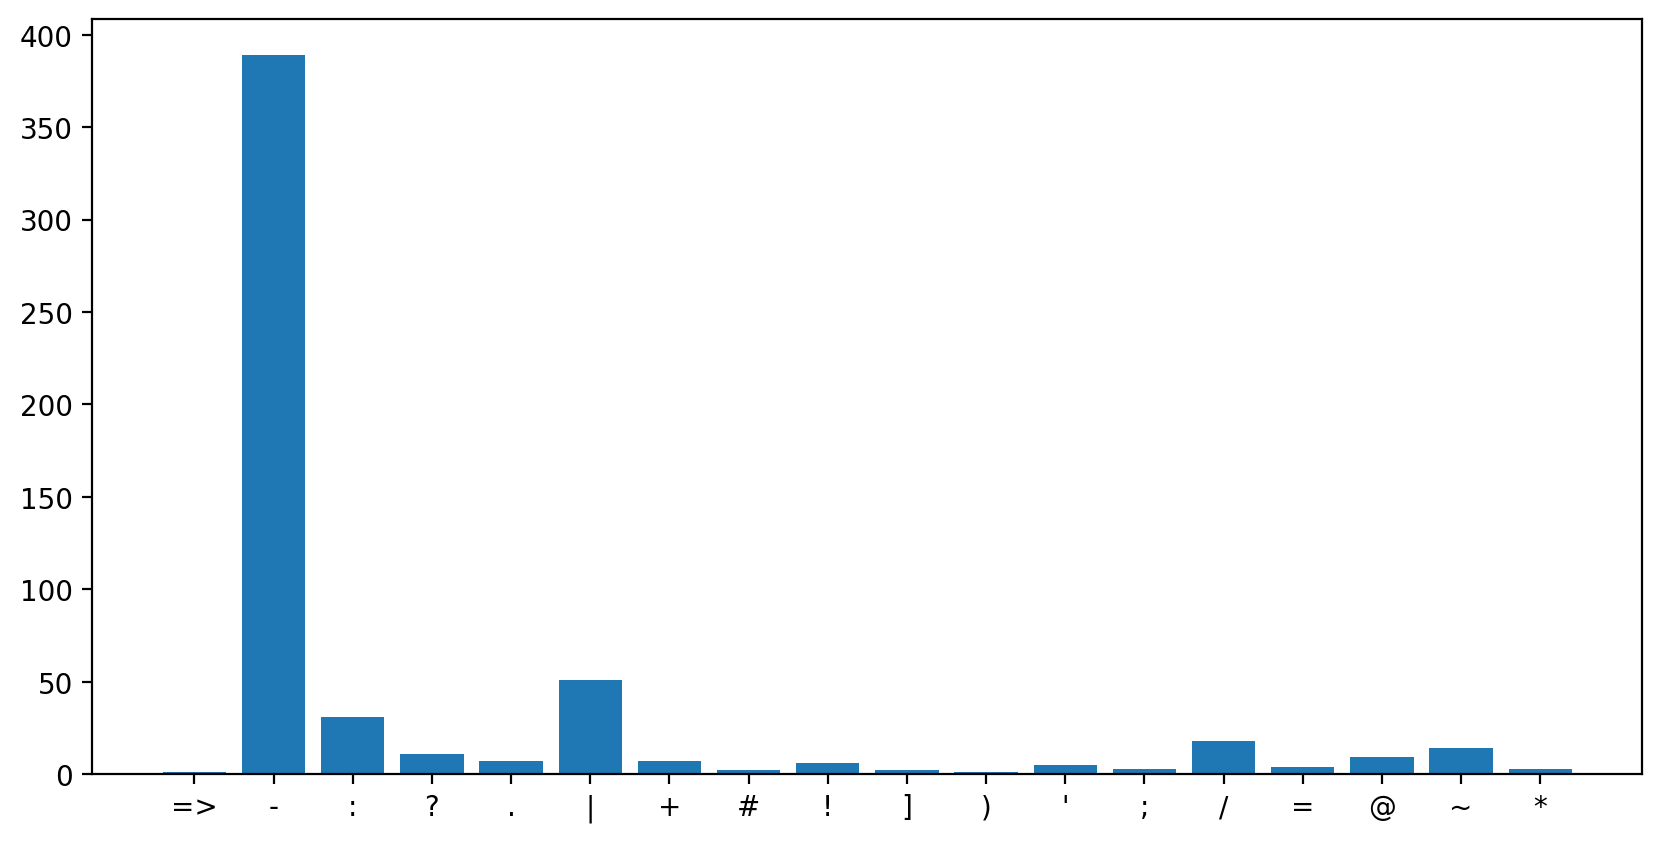

In [ ]:
from collections import defaultdict
corpus=[]
for x in df_train[df_train['target']==1]['text'].str.split():
    for i in x:
        corpus.append(i)
plt.figure(figsize=(10,5),dpi=200)
dic=defaultdict(int)
for i in corpus:
    if i in string.punctuation:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

/opt/anaconda3/envs/charts/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<BarContainer object of 20 artists>

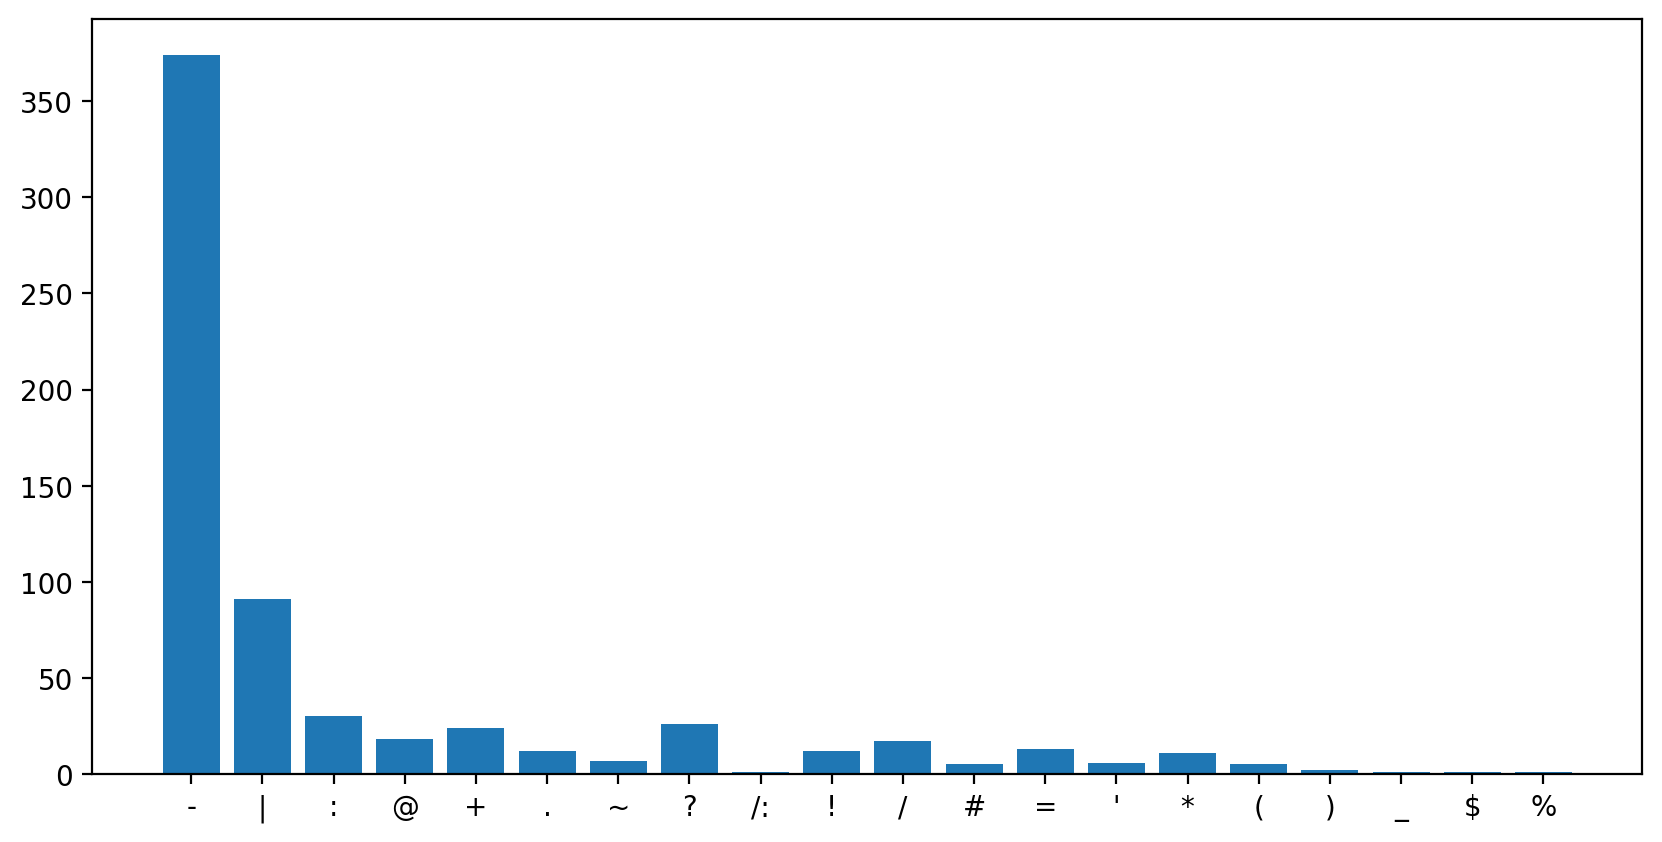

In [ ]:
from collections import defaultdict
corpus0=[]
for x in df_train[df_train['target']==0]['text'].str.split():
    for i in x:
        corpus0.append(i)
plt.figure(figsize=(10,5),dpi=200)
dic=defaultdict(int)
for i in corpus0:
    if i in string.punctuation:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

## 2.3 Keyword

In [ ]:
kw1=df_train[df_train.target==1]["keyword"]
kw0=df_train[df_train.target==0]["keyword"]
kw2=df_test["keyword"]
kw1=kw1.dropna()
kw0=kw0.dropna()
kw2=kw2.dropna()

In [ ]:
keyword_TRUE = pd.DataFrame(Counter(kw1).most_common(20), columns = ["Keyword", "Frequency"])
keyword_FALSE = pd.DataFrame(Counter(kw0).most_common(20), columns = ["Keyword", "Frequency"])
keyword_test=pd.DataFrame(Counter(kw2).most_common(20), columns = ["Keyword", "Frequency"])

/opt/anaconda3/envs/charts/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


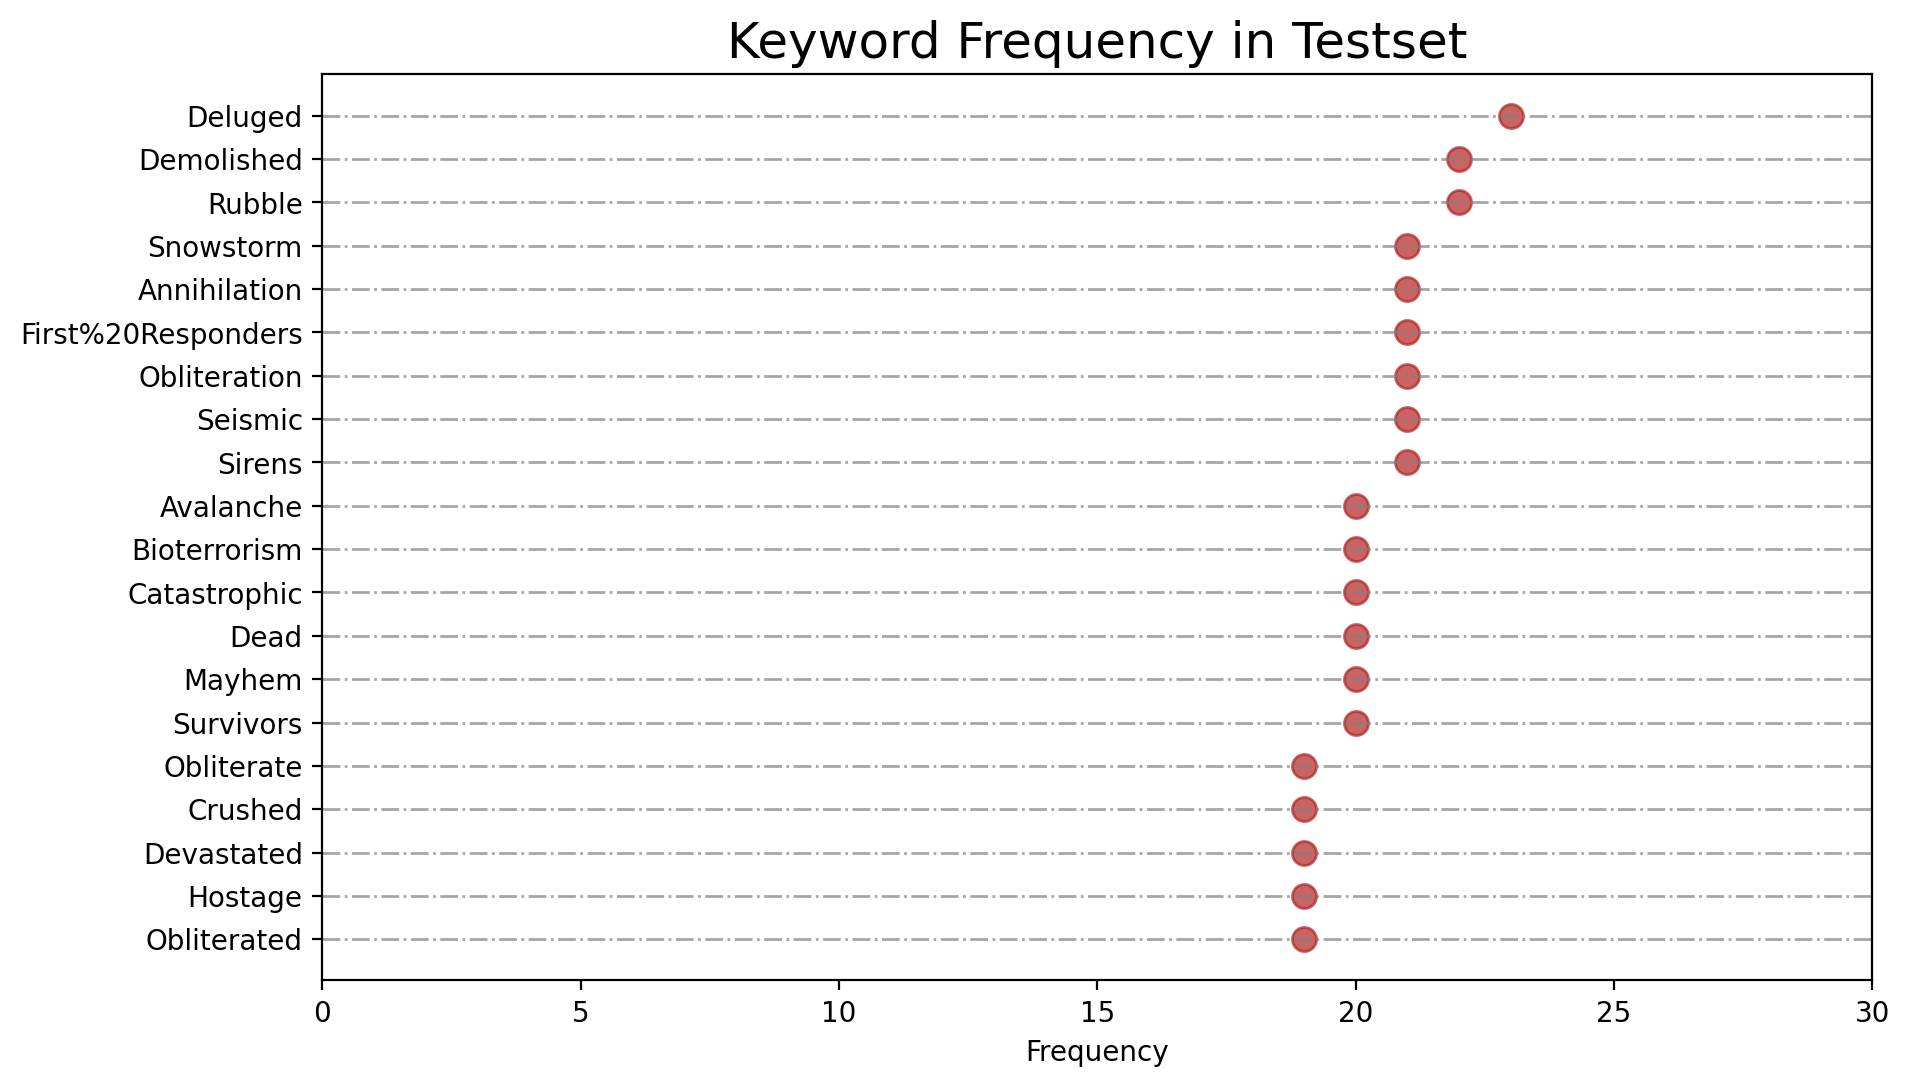

In [ ]:
# Draw keyword_frequency of testset plot 
keyword_test.sort_values('Frequency', inplace=True)
fig, ax = plt.subplots(figsize=(10,6), dpi= 200)
ax.hlines(y=keyword_test["Keyword"], xmin=0, xmax=30, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=keyword_test["Keyword"], x=keyword_test["Frequency"], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Keyword Frequency in Testset', fontdict={'size':18})
ax.set_xlabel('Frequency')
ax.set_yticks(keyword_test["Keyword"])
ax.set_yticklabels(keyword_test.Keyword.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(0, 30)

plt.show()

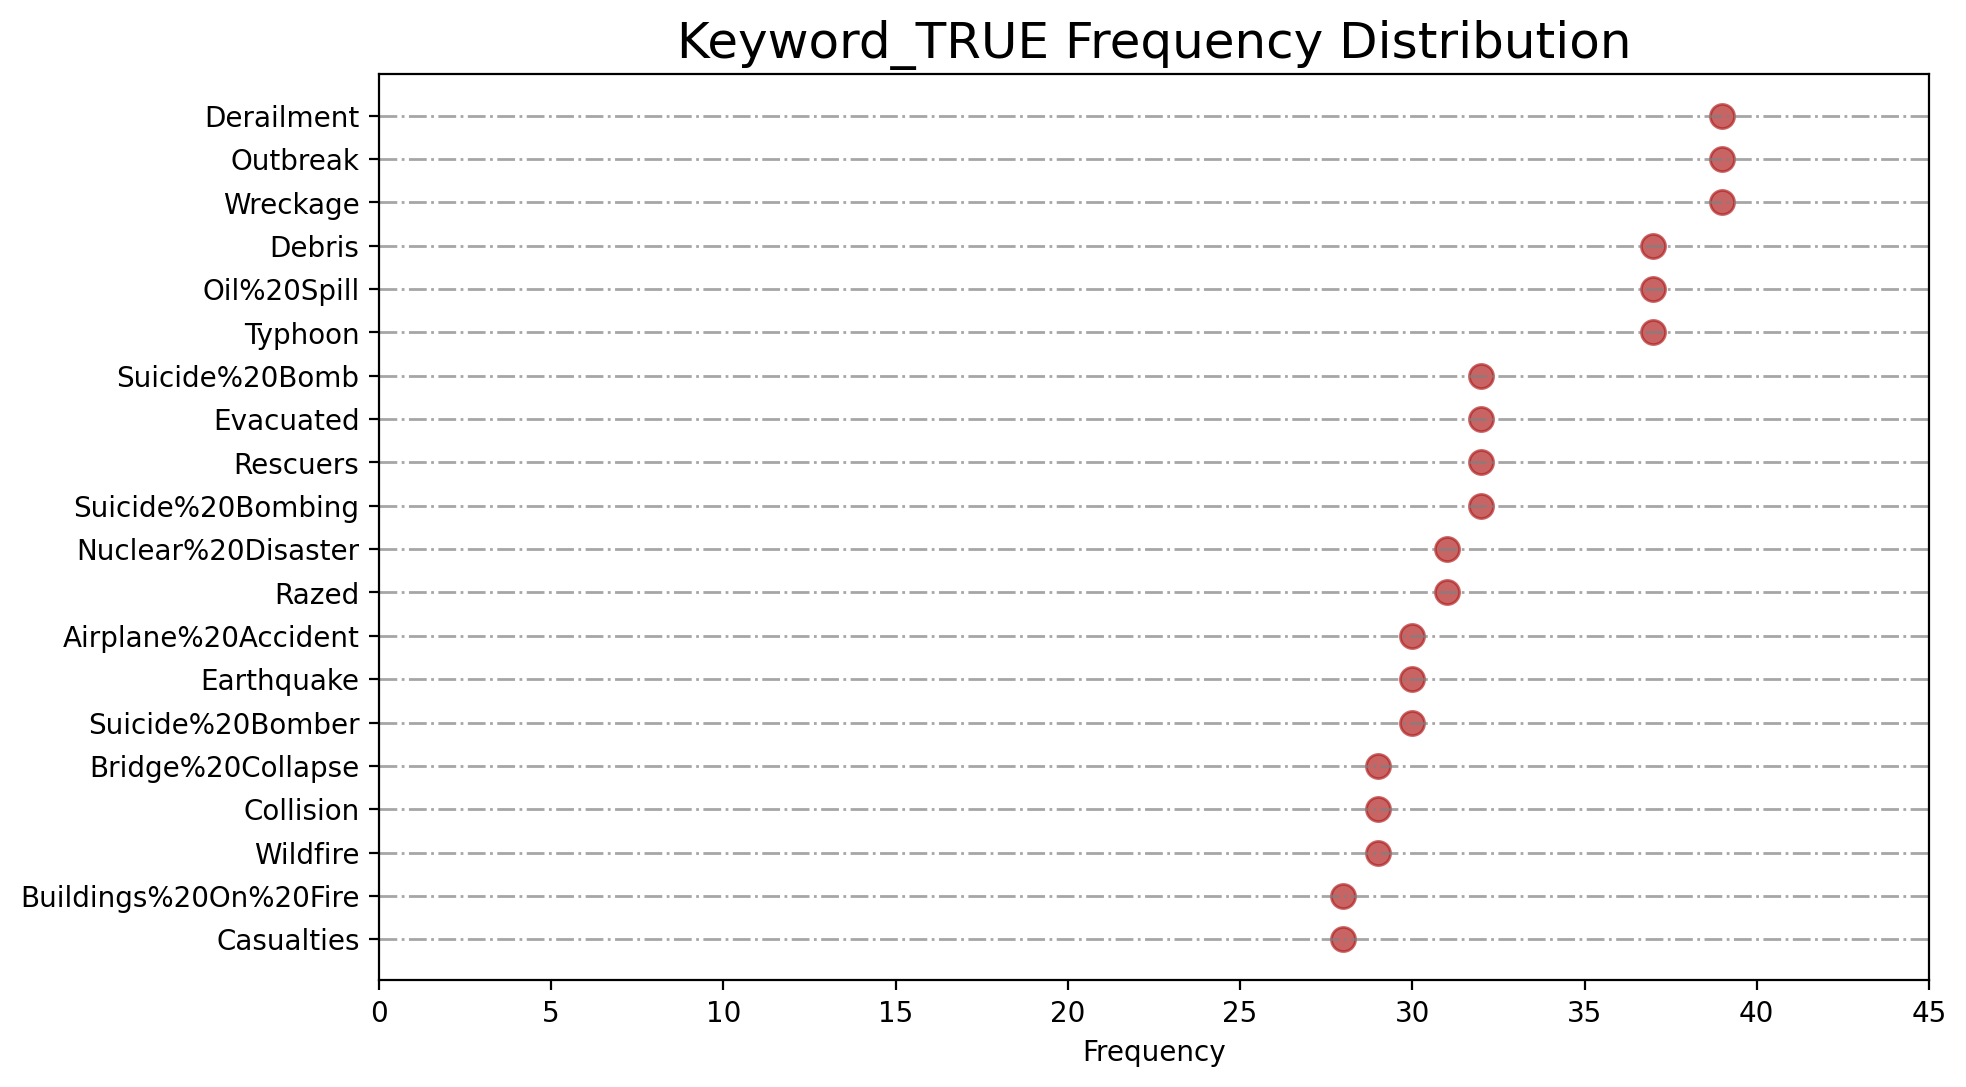

In [ ]:
# Draw keyword_frequency plot
keyword_TRUE.sort_values('Frequency', inplace=True)
fig, ax = plt.subplots(figsize=(10,6), dpi= 200)
ax.hlines(y=keyword_TRUE["Keyword"], xmin=0, xmax=45, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=keyword_TRUE["Keyword"], x=keyword_TRUE["Frequency"], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Keyword_TRUE Frequency Distribution', fontdict={'size':18})
ax.set_xlabel('Frequency')
ax.set_yticks(keyword_TRUE["Keyword"])
ax.set_yticklabels(keyword_TRUE.Keyword.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(0, 45)

plt.show()

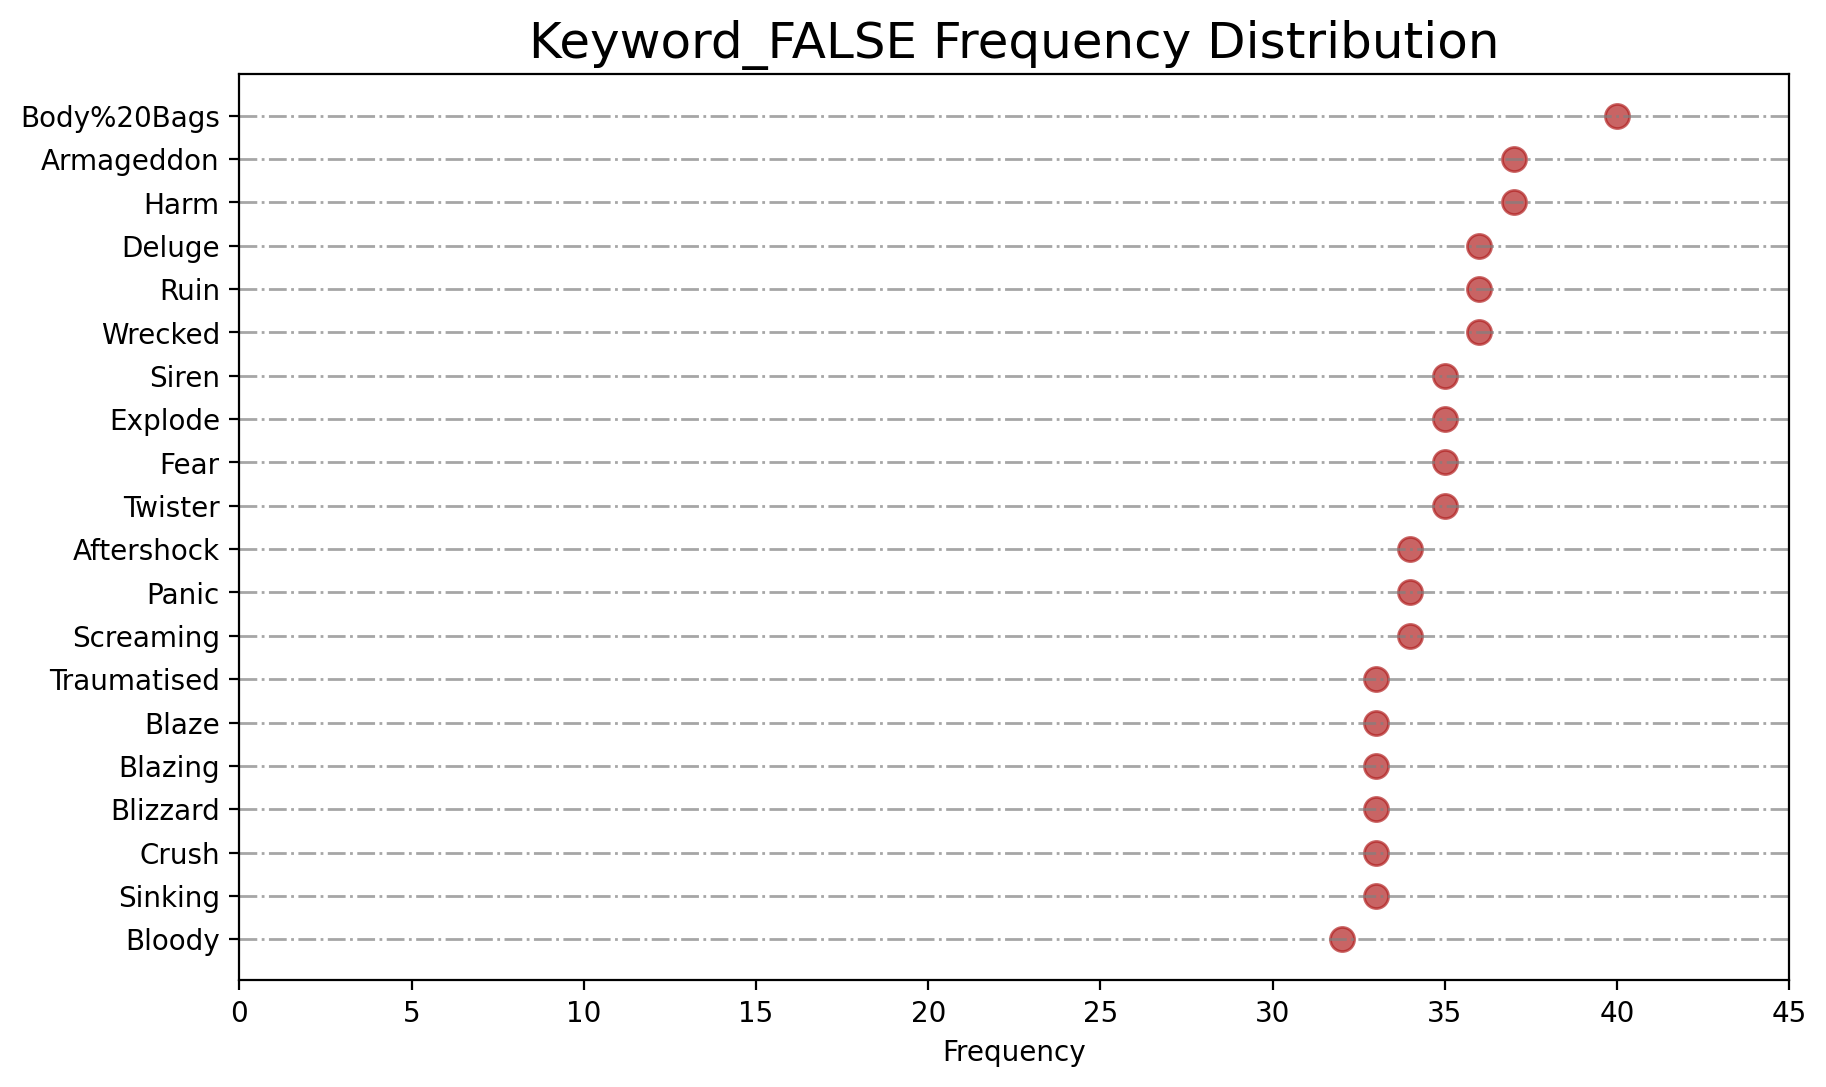

In [ ]:
# Draw keyword_frequency plot
keyword_FALSE.sort_values('Frequency', inplace=True)
fig, ax = plt.subplots(figsize=(10,6), dpi= 200)
ax.hlines(y=keyword_FALSE["Keyword"], xmin=0, xmax=45, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=keyword_FALSE["Keyword"], x=keyword_FALSE["Frequency"], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Keyword_FALSE Frequency Distribution', fontdict={'size':18})
ax.set_xlabel('Frequency')
ax.set_yticks(keyword_FALSE["Keyword"])
ax.set_yticklabels(keyword_FALSE.Keyword.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(0, 45)

plt.show()

## 2.4 Location Map

In [ ]:
df1=df_train[df_train.target==1]["location"]
df0=df_train[df_train.target==0]["location"]
df1=df1.dropna()
df0=df0.dropna()
df2=df_test["location"]
df2=df2.dropna()

/opt/anaconda3/envs/charts/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
location_TRUE = pd.DataFrame(Counter(df1).most_common(), columns = ["Location", "Frequency"])
location_FALSE = pd.DataFrame(Counter(df0).most_common(), columns = ["Location", "Frequency"])
location_test = pd.DataFrame(Counter(df2).most_common(), columns = ["Location", "Frequency"])


/opt/anaconda3/envs/charts/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np
loc1=np.array(location_TRUE)
loc1.tolist()
loc0=np.array(location_FALSE)
loc0.tolist()
loc2=np.array(location_test)
loc2.tolist()

[['New York', 38],
 ['USA', 37],
 ['Worldwide', 16],
 ['United States', 15],
 ['London', 13],
 ['Canada', 13],
 ['United Kingdom', 12],
 ['Nigeria', 12],
 ['Kenya', 12],
 ['India', 11],
 ['Los Angeles', 11],
 ['Washington, DC', 10],
 ['San Francisco', 9],
 ['Philippines', 9],
 ['San Francisco, CA', 9],
 ['NYC', 9],
 ['California', 8],
 ['Los Angeles, CA', 8],
 ['Australia', 7],
 ['Florida', 7],
 ['Singapore', 7],
 ['Seattle, WA', 7],
 ['New York, NY', 7],
 ['California, USA', 6],
 ['Chicago', 6],
 ['UK', 6],
 ['Melbourne, Australia', 6],
 ['Mumbai', 6],
 ['Paterson, New Jersey ', 5],
 ['Chicago, IL', 5],
 ['Maryland', 5],
 ['Denver, CO', 5],
 ['Las Vegas', 5],
 ['Calgary, Alberta', 5],
 ['San Diego', 4],
 ['Colorado', 4],
 ['Memphis, TN', 4],
 ['Las Vegas, NV', 4],
 ['ss', 4],
 ['Michigan', 4],
 ['Orlando', 4],
 ['Philadelphia, PA', 4],
 ['Indiana', 4],
 ['New Jersey, USA', 4],
 ['Manchester', 4],
 ['England', 4],
 ['Sydney, Australia', 4],
 ['Liverpool', 4],
 ['Lagos', 4],
 [' Road to

In [ ]:
(
    Map(init_opts=opts.InitOpts(width="700px", height="400px"))
    .add(
        series_name="Testset",
        maptype="world",
        data_pair=loc2,
        is_map_symbol_show=False,
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="Location_Testset Map",
        ),
        visualmap_opts=opts.VisualMapOpts(
            min_=0,
            max_=100,
            range_text=["High", "Low"],
            is_calculable=True,
            range_color=[ "silver","blue"],
        ),
    )
    .render_notebook()
)


/opt/anaconda3/envs/charts/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/envs/charts/lib/python3.8/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [ ]:
(
    Map(init_opts=opts.InitOpts(width="700px", height="400px"))
    .add(
        series_name="TRUE",
        maptype="world",
        data_pair=loc1,
        is_map_symbol_show=False,
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="Location_TRUE Map",
        ),
        visualmap_opts=opts.VisualMapOpts(
            min_=0,
            max_=100,
            range_text=["High", "Low"],
            is_calculable=True,
            range_color=[ "yellow","green"],
        ),
    )
    .render_notebook()
)


/opt/anaconda3/envs/charts/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/envs/charts/lib/python3.8/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [ ]:
(
    Map(init_opts=opts.InitOpts(width="700px", height="400px"))
    #.add_js_funcs("echarts.registerMap('HK', {});".format(data))
    .add(
        series_name="False",
        maptype="world",
        data_pair=loc0,
        name_map=list(location_FALSE["Location"]),
        is_map_symbol_show=False,
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="location_FALSE Map",
        ),
      
        visualmap_opts=opts.VisualMapOpts(
            min_=0,
            max_=100,
            range_text=["High", "Low"],
            is_calculable=True,
            range_color=["lightskyblue", "purple"],
        ),
    )
    .render_notebook()
)


/opt/anaconda3/envs/charts/lib/python3.8/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


# 3.Correlation
## 3.1 Correlation Matrix

/opt/anaconda3/envs/charts/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


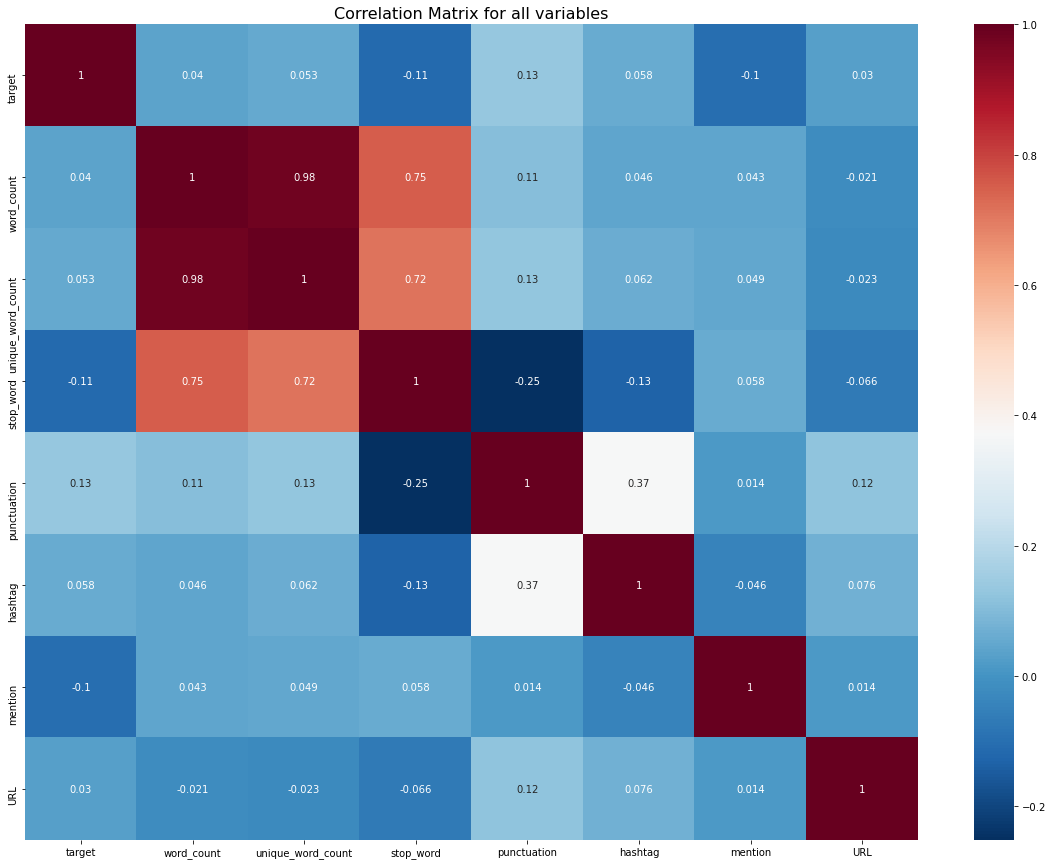

In [ ]:
df_train_vis=df_train.iloc[:,4:]
corr = df_train_vis.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, cbar=True, cmap="RdBu_r",ax=ax,annot=True)
plt.title("Correlation Matrix for all variables", fontsize=16)
plt.savefig("1110.png")
plt.show()

In [ ]:
df_test.target.groupby(df_test["target"]).count()

/opt/anaconda3/envs/charts/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: 'DataFrame' object has no attribute 'target'

## 3.2 Correlation between calculation field and DV

Text(0.5, 1.0, 'the correlation between target and hashtag count')

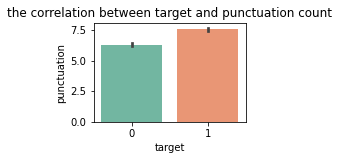

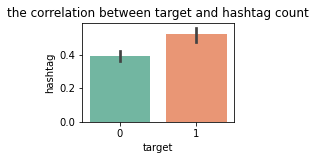

In [ ]:
fig = plt.figure() 
ax1 = fig.add_subplot(2,2,1)
g = sns.barplot(x="target", y="punctuation",
                    data=df_train, palette="Set2",ax=ax1)

g.set_title("the correlation between target and punctuation count")
fig = plt.figure() 
ax2 = fig.add_subplot(2,2,2)
g = sns.barplot(x="target", y="hashtag",
                    data=df_train, palette="Set2",ax=ax2)

g.set_title("the correlation between target and hashtag count")

/opt/anaconda3/envs/charts/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'the correlation between target and word count')

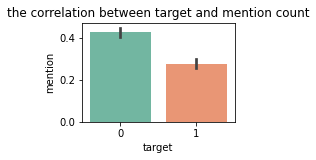

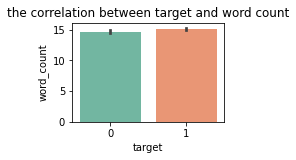

In [ ]:
fig = plt.figure() 
ax1 = fig.add_subplot(221)
g = sns.barplot(x="target", y="mention",
                    data=df_train, palette="Set2",ax=ax1)

g.set_title("the correlation between target and mention count")
fig = plt.figure() 

ax1 = fig.add_subplot(221)
g = sns.barplot(x="target", y="word_count",
                    data=df_train, palette="Set2",ax=ax1)

g.set_title("the correlation between target and word count")
